In [13]:
import numpy as numpy                               
import pandas as pandas                               
import seaborn as seaborn
import plotly.graph_objects as graph_object
import matplotlib.pyplot as plot

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score
from math import sqrt
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pandas.read_csv("consumer_data.csv", sep="\t")
data.head()

id  birth_year education_level relationship_status   salary  kids_count   
0  5524        1957      Graduation              Single  58138.0           0  \
1  2174        1954      Graduation              Single  46344.0           1   
2  4141        1965      Graduation            Together  71613.0           0   
3  6182        1984      Graduation            Together  26646.0           1   
4  5324        1981             PhD             Married  58293.0           1   

   teens_count customer_since  last_bought  wines_amount  ...   
0            0     04-09-2012           58           635  ...  \
1            1     08-03-2014           38            11  ...   
2            0     21-08-2013           26           426  ...   
3            0     10-02-2014           26            11  ...   
4            0     19-01-2014           94           173  ...   

   web_visits_per_month  is_campaign_accepted_3  is_campaign_accepted_4   
0                     7                       0                       0  \
1                     5                       0                       0   
2                     4                       0                       0   
3                     6                       0                       0   
4                     5                       0                       0   

   is_campaign_accepted_5  is_campaign_accepted_1  is_campaign_accepted_2   
0                       0                       0                       0  \
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   complained  z_cost_to_contact  z_profit  last_campaign_accepted  
0           0                  3        11                       1  
1           0                  3        11                       0  
2           0                  3        11                       0  
3           0                  3        11                       0  
4           0                  3        11                       0  

[5 rows x 29 columns]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2240 non-null   int64  
 1   birth_year              2240 non-null   int64  
 2   education_level         2240 non-null   object 
 3   relationship_status     2240 non-null   object 
 4   salary                  2216 non-null   float64
 5   kids_count              2240 non-null   int64  
 6   teens_count             2240 non-null   int64  
 7   customer_since          2240 non-null   object 
 8   last_bought             2240 non-null   int64  
 9   wines_amount            2240 non-null   int64  
 10  fruits_amount           2240 non-null   int64  
 11  meat_amount             2240 non-null   int64  
 12  fish_amount             2240 non-null   int64  
 13  dessert_amount          2240 non-null   int64  
 14  gold_amount             2240 non-null   

In [16]:
data.describe()

id   birth_year         salary   kids_count  teens_count   
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000  \
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

       last_bought  wines_amount  fruits_amount  meat_amount  fish_amount   
count  2240.000000   2240.000000    2240.000000  2240.000000  2240.000000  \
mean     49.109375    303.935714      26.302232   166.950000    37.525446   
std      28.962453    336.597393      39.773434   225.715373    54.628979   
min       0.000000      0.000000       0.000000     0.000000     0.000000   
25%      24.000000     23.750000       1.000000    16.000000     3.000000   
50%      49.000000    173.500000       8.000000    67.000000    12.000000   
75%      74.000000    504.250000      33.000000   232.000000    50.000000   
max      99.000000   1493.000000     199.000000  1725.000000   259.000000   

       ...  web_visits_per_month  is_campaign_accepted_3   
count  ...           2240.000000             2240.000000  \
mean   ...              5.316518                0.072768   
std    ...              2.426645                0.259813   
min    ...              0.000000                0.000000   
25%    ...              3.000000                0.000000   
50%    ...              6.000000                0.000000   
75%    ...              7.000000                0.000000   
max    ...             20.000000                1.000000   

       is_campaign_accepted_4  is_campaign_accepted_5  is_campaign_accepted_1   
count             2240.000000             2240.000000             2240.000000  \
mean                 0.074554                0.072768                0.064286   
std                  0.262728                0.259813                0.245316   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       is_campaign_accepted_2   complained  z_cost_to_contact  z_profit   
count             2240.000000  2240.000000             2240.0    2240.0  \
mean                 0.013393     0.009375                3.0      11.0   
std                  0.114976     0.096391                0.0       0.0   
min                  0.000000     0.000000                3.0      11.0   
25%                  0.000000     0.000000                3.0      11.0   
50%                  0.000000     0.000000                3.0      11.0   
75%                  0.000000     0.000000                3.0      11.0   
max                  1.000000     1.000000                3.0      11.0   

       last_campaign_accepted  
count             2240.000000  
mean                 0.149107  
std                  0.356274  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000  

[8 rows x 26 columns]

In [17]:
data = data.drop(['z_cost_to_contact', 'z_profit'],axis=1)
data.head()

id  birth_year education_level relationship_status   salary  kids_count   
0  5524        1957      Graduation              Single  58138.0           0  \
1  2174        1954      Graduation              Single  46344.0           1   
2  4141        1965      Graduation            Together  71613.0           0   
3  6182        1984      Graduation            Together  26646.0           1   
4  5324        1981             PhD             Married  58293.0           1   

   teens_count customer_since  last_bought  wines_amount  ...   
0            0     04-09-2012           58           635  ...  \
1            1     08-03-2014           38            11  ...   
2            0     21-08-2013           26           426  ...   
3            0     10-02-2014           26            11  ...   
4            0     19-01-2014           94           173  ...   

   catalog_purchases  instore_purchases  web_visits_per_month   
0                 10                  4                     7  \
1                  1                  2                     5   
2                  2                 10                     4   
3                  0                  4                     6   
4                  3                  6                     5   

   is_campaign_accepted_3  is_campaign_accepted_4  is_campaign_accepted_5   
0                       0                       0                       0  \
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   is_campaign_accepted_1  is_campaign_accepted_2  complained   
0                       0                       0           0  \
1                       0                       0           0   
2                       0                       0           0   
3                       0                       0           0   
4                       0                       0           0   

   last_campaign_accepted  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 27 columns]

In [18]:
plot.rcParams.update(plot.rcParamsDefault)

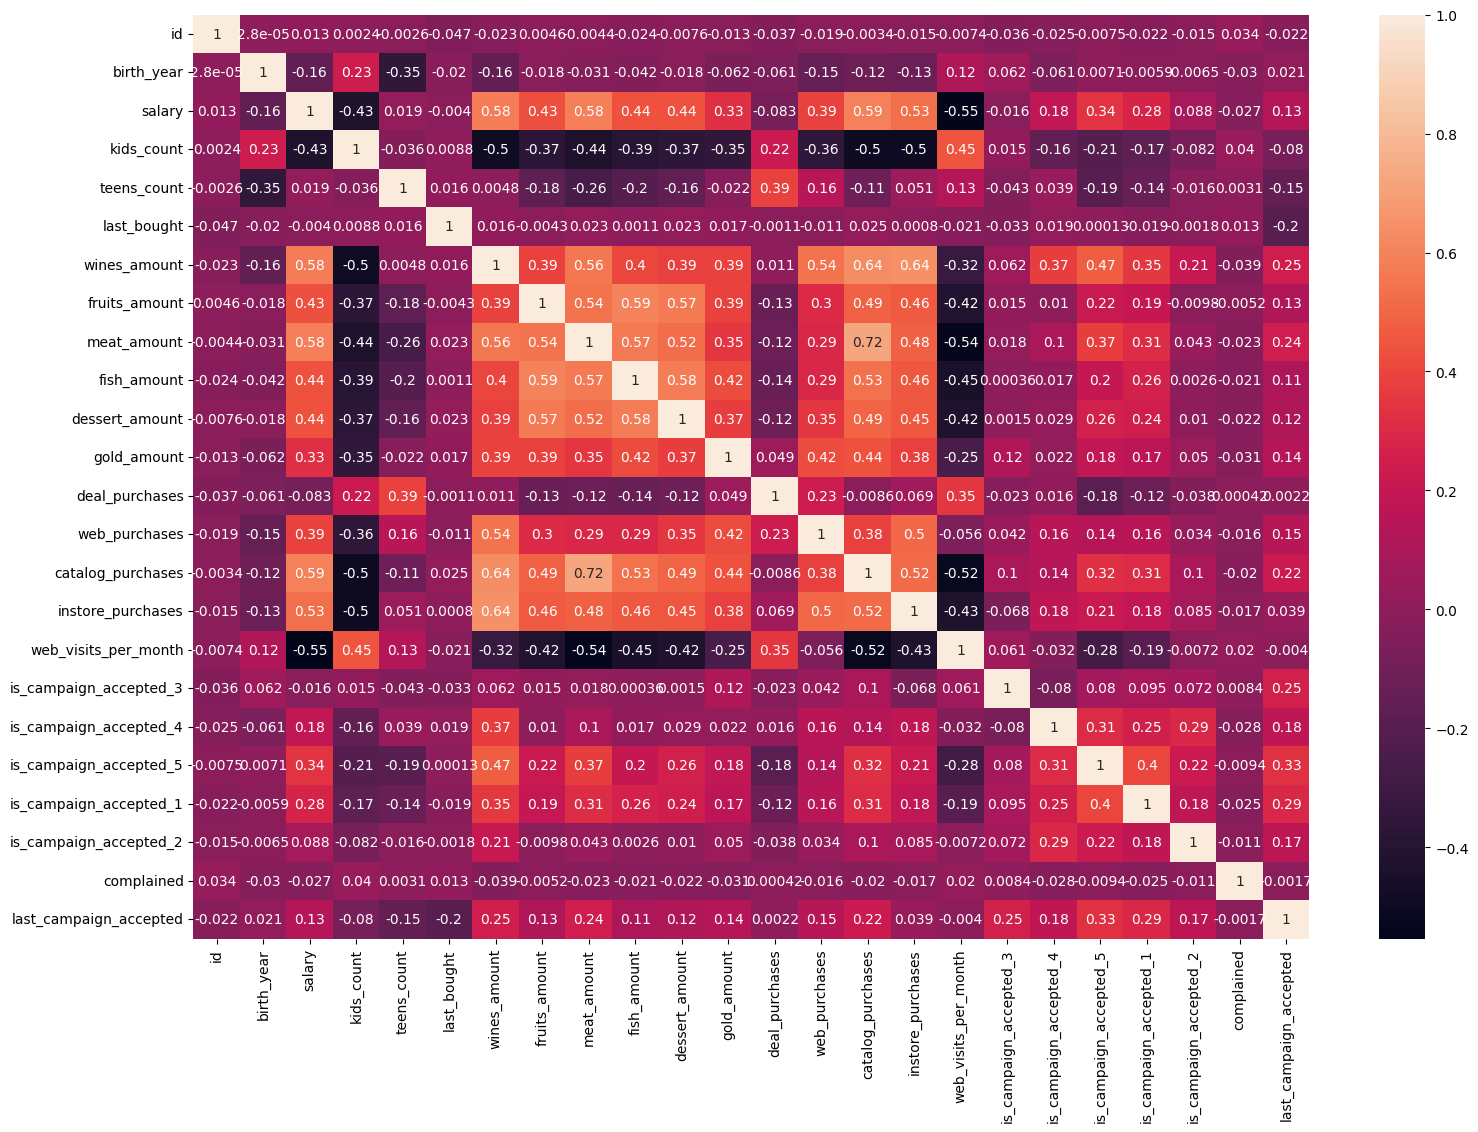

In [19]:
numeric_columns = data.select_dtypes(include=[numpy.number]).columns
correlation_matrix = data[numeric_columns].corr()

plot.figure(figsize=(18, 12))
seaborn.heatmap(correlation_matrix, annot=True)
plot.show()

In [20]:
numeric_columns = data.select_dtypes(include=[numpy.number]).columns
corr_data = data[numeric_columns].corr().abs().unstack().sort_values(ascending=False)[24:50:2]

print(corr_data)

meat_amount        catalog_purchases       0.723827
instore_purchases  wines_amount            0.642100
catalog_purchases  wines_amount            0.635226
fruits_amount      fish_amount             0.594804
salary             catalog_purchases       0.589162
                   meat_amount             0.584633
fish_amount        dessert_amount          0.579870
salary             wines_amount            0.578650
fish_amount        meat_amount             0.568402
dessert_amount     fruits_amount           0.567164
meat_amount        wines_amount            0.562667
salary             web_visits_per_month    0.553088
meat_amount        fruits_amount           0.543105
dtype: float64


In [21]:
data['salary'] = data['salary'].fillna(data['salary'].mean())
data.isna().any() 

id                        False
birth_year                False
education_level           False
relationship_status       False
salary                    False
kids_count                False
teens_count               False
customer_since            False
last_bought               False
wines_amount              False
fruits_amount             False
meat_amount               False
fish_amount               False
dessert_amount            False
gold_amount               False
deal_purchases            False
web_purchases             False
catalog_purchases         False
instore_purchases         False
web_visits_per_month      False
is_campaign_accepted_3    False
is_campaign_accepted_4    False
is_campaign_accepted_5    False
is_campaign_accepted_1    False
is_campaign_accepted_2    False
complained                False
last_campaign_accepted    False
dtype: bool

In [22]:
data.head()

id  birth_year education_level relationship_status   salary  kids_count   
0  5524        1957      Graduation              Single  58138.0           0  \
1  2174        1954      Graduation              Single  46344.0           1   
2  4141        1965      Graduation            Together  71613.0           0   
3  6182        1984      Graduation            Together  26646.0           1   
4  5324        1981             PhD             Married  58293.0           1   

   teens_count customer_since  last_bought  wines_amount  ...   
0            0     04-09-2012           58           635  ...  \
1            1     08-03-2014           38            11  ...   
2            0     21-08-2013           26           426  ...   
3            0     10-02-2014           26            11  ...   
4            0     19-01-2014           94           173  ...   

   catalog_purchases  instore_purchases  web_visits_per_month   
0                 10                  4                     7  \
1                  1                  2                     5   
2                  2                 10                     4   
3                  0                  4                     6   
4                  3                  6                     5   

   is_campaign_accepted_3  is_campaign_accepted_4  is_campaign_accepted_5   
0                       0                       0                       0  \
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   is_campaign_accepted_1  is_campaign_accepted_2  complained   
0                       0                       0           0  \
1                       0                       0           0   
2                       0                       0           0   
3                       0                       0           0   
4                       0                       0           0   

   last_campaign_accepted  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 27 columns]

In [23]:
data['relationship_status'].value_counts()  

relationship_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

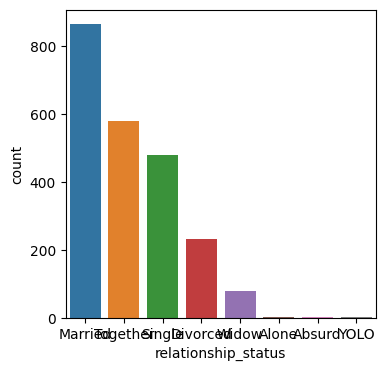

In [24]:
marital_counts = data['relationship_status'].value_counts()

plot.figure(figsize=(4, 4))
seaborn.barplot(x=marital_counts.index, y=marital_counts)
plot.show()

In [25]:
data['relationship_status'] = data['relationship_status'].replace(['Married', 'Together'],'relationship')
data['relationship_status'] = data['relationship_status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [26]:
data['relationship_status'].value_counts()  

relationship_status
relationship    1444
Single           796
Name: count, dtype: int64

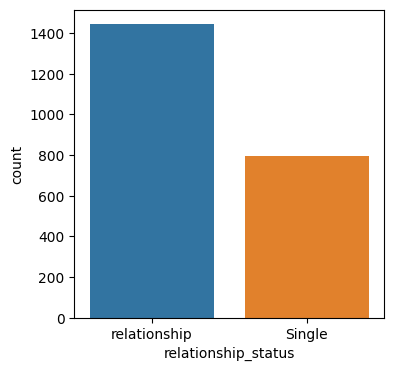

In [27]:
marital_counts = data['relationship_status'].value_counts()

plot.figure(figsize=(4, 4))
seaborn.barplot(x=marital_counts.index, y=marital_counts)
plot.show()

In [28]:
product_data = []
for i in range(0, len(data)):
  productdata = [data['wines_amount'][i], data['fruits_amount'][i], 
                  data['meat_amount'][i], data['fish_amount'][i], 
                  data['dessert_amount'][i], data['gold_amount'][i]]
  product_data.append(productdata)
products_data = pandas.DataFrame(product_data, columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
products_data.head()

Wines  Fruits  Meat  Fish  Sweets  Gold
0    635      88   546   172      88    88
1     11       1     6     2       1     6
2    426      49   127   111      21    42
3     11       4    20    10       3     5
4    173      43   118    46      27    15

In [29]:
data['Kids'] = data['kids_count'] + data['teens_count']
data['Expenses'] = data['wines_amount'] + data['fruits_amount'] + data['meat_amount'] + data['fish_amount'] + data['dessert_amount'] + data['gold_amount']
data['TotalAcceptedCmp'] = data['is_campaign_accepted_1'] + data['is_campaign_accepted_2'] + data['is_campaign_accepted_3'] + data['is_campaign_accepted_4'] + data['is_campaign_accepted_5'] + data['last_campaign_accepted']
data['NumTotalPurchases'] = data['web_purchases'] + data['catalog_purchases'] + data['instore_purchases'] + data['deal_purchases']

In [30]:
col_del = ["is_campaign_accepted_1" , "is_campaign_accepted_2", "is_campaign_accepted_3" , "is_campaign_accepted_4","is_campaign_accepted_5", "last_campaign_accepted","web_visits_per_month", "web_purchases","catalog_purchases","instore_purchases","deal_purchases" , "kids_count", "teens_count","wines_amount", "fruits_amount", "meat_amount", "fish_amount", "dessert_amount", "gold_amount"]
data=data.drop(columns=col_del,axis=1)
data.head()

id  birth_year education_level relationship_status   salary   
0  5524        1957      Graduation              Single  58138.0  \
1  2174        1954      Graduation              Single  46344.0   
2  4141        1965      Graduation        relationship  71613.0   
3  6182        1984      Graduation        relationship  26646.0   
4  5324        1981             PhD        relationship  58293.0   

  customer_since  last_bought  complained  Kids  Expenses  TotalAcceptedCmp   
0     04-09-2012           58           0     0      1617                 1  \
1     08-03-2014           38           0     2        27                 0   
2     21-08-2013           26           0     0       776                 0   
3     10-02-2014           26           0     1        53                 0   
4     19-01-2014           94           0     1       422                 0   

   NumTotalPurchases  
0                 25  
1                  6  
2                 21  
3                  8  
4                 19

In [31]:
data['Age'] = 2015 - data["birth_year"]

In [32]:
data['education_level'].value_counts()

education_level
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [33]:
data['education_level'] = data['education_level'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
data['education_level'] = data['education_level'].replace(['Basic'], 'UG')

In [34]:
data['customer_since'] = pandas.to_datetime(data['customer_since'], format='%d-%m-%Y')
data['first_day'] = '01-01-2015'
data['first_day'] = pandas.to_datetime(data['first_day'], format='%d-%m-%Y')
data['day_engaged'] = (data['first_day'] - data['customer_since']).dt.days

In [35]:
data=data.drop(columns=["id", "customer_since", "first_day", "birth_year", "customer_since", "last_bought", "complained"],axis=1)
data.shape

(2240, 9)

In [36]:
data.head()

education_level relationship_status   salary  Kids  Expenses   
0              PG              Single  58138.0     0      1617  \
1              PG              Single  46344.0     2        27   
2              PG        relationship  71613.0     0       776   
3              PG        relationship  26646.0     1        53   
4              PG        relationship  58293.0     1       422   

   TotalAcceptedCmp  NumTotalPurchases  Age  day_engaged  
0                 1                 25   58          849  
1                 0                  6   61          299  
2                 0                 21   50          498  
3                 0                  8   31          325  
4                 0                 19   34          347

In [37]:
plot.rcParams.update(plot.rcParamsDefault)

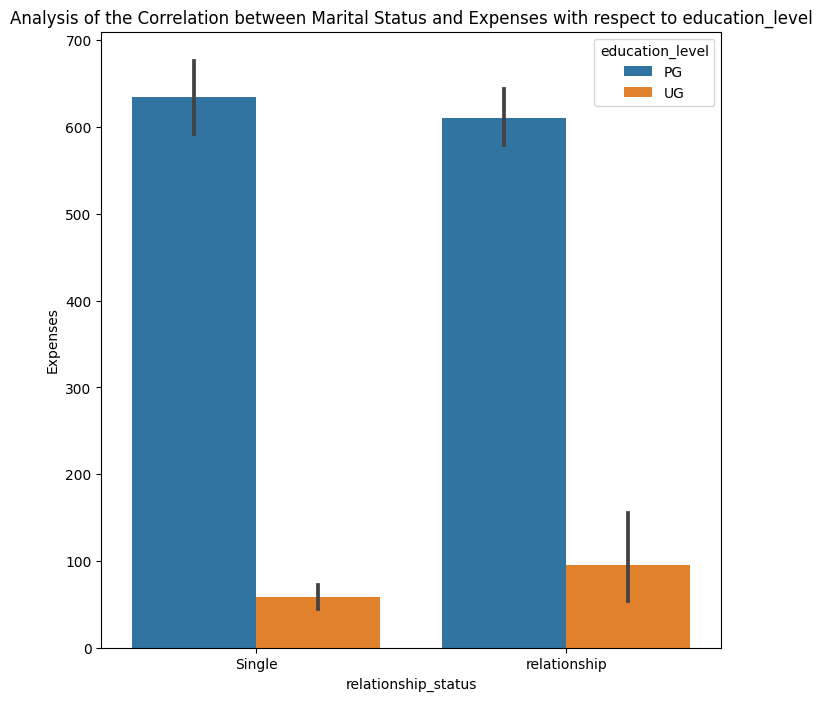

In [38]:
plot.figure(figsize=(8,8))
seaborn.barplot(x=data['relationship_status'], y=data['Expenses'], hue = data["education_level"])
plot.title("Analysis of the Correlation between Marital Status and Expenses with respect to education_level")
plot.show()

In [39]:
plot.figure(figsize=(8,8))
seaborn.barplot(x=data['relationship_status'], y=data['Expenses'])
plot.title("Analysis of the Correlation between Marital Status and Expenses")
plot.show()

In [40]:
plot.figure(figsize=(8,8))
plot.hist("Expenses", data = data[data["relationship_status"] == "relationship"], alpha = 0.5, label = "relationship")
plot.hist("Expenses", data = data[data["relationship_status"] == "Single"], alpha = 0.5, label = "Single")
plot.title("Distribution of Expenses with respect to Marital Status")
plot.xlabel("Expenses")
plot.legend(title = "Marital Status")
plot.show()

In [41]:
plot.figure(figsize=(8,8))
plot.hist("Expenses", data = data[data["education_level"] == "PG"], alpha = 0.5, label = "PG")
plot.hist("Expenses", data = data[data["education_level"] == "UG"], alpha = 0.5, label = "UG")
plot.title("Distribution of Expenses with respect to education_level")
plot.xlabel("Expenses")
plot.legend(title = "education_level")
plot.show()

In [42]:
plot.figure(figsize=(8,8))
plot.hist("NumTotalPurchases", data = data[data["education_level"] == "PG"], alpha = 0.5, label = "PG")
plot.hist("NumTotalPurchases", data = data[data["education_level"] == "UG"], alpha = 0.5, label = "UG")
plot.title("Distribution of Number of Total Purchases with respect to education_level")
plot.xlabel("Number of Total Purchases")
plot.legend(title = "education_level")
plot.show()

In [43]:
plot.figure(figsize=(8,8))
plot.hist("Age", data = data[data["relationship_status"] == "relationship"], alpha = 0.5, label = "relationship")
plot.hist("Age", data = data[data["relationship_status"] == "Single"], alpha = 0.5, label = "Single")
plot.title("Distribution of Age with respect to Marital Status")
plot.xlabel("Age")
plot.legend(title = "Marital Status")
plot.show()

In [44]:
plot.figure(figsize=(8,8))
plot.pie(data["relationship_status"].value_counts(), labels = ["relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plot.legend()
plot.show()

In [45]:
seaborn.barplot(x = data['Expenses'],y = data['education_level']);
plot.title('Total Expense based on the education_level Level');
plot.show()

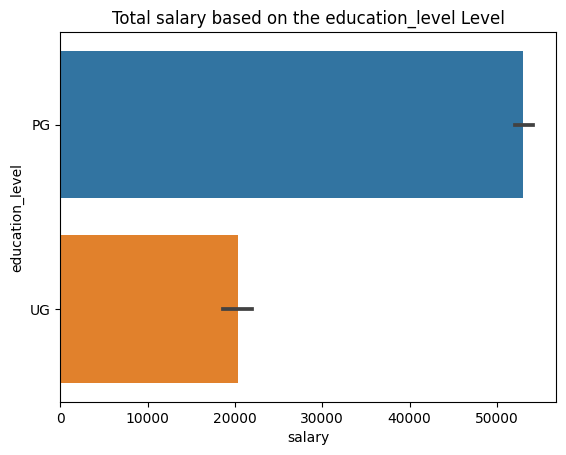

In [46]:
seaborn.barplot(x = data['salary'],y = data['education_level']);
plot.title('Total salary based on the education_level Level');
plot.show()

In [47]:
data.describe()

salary         Kids     Expenses  TotalAcceptedCmp   
count    2240.000000  2240.000000  2240.000000       2240.000000  \
mean    52247.251354     0.950446   605.798214          0.446875   
std     25037.797168     0.751803   602.249288          0.890543   
min      1730.000000     0.000000     5.000000          0.000000   
25%     35538.750000     0.000000    68.750000          0.000000   
50%     51741.500000     1.000000   396.000000          0.000000   
75%     68289.750000     1.000000  1045.500000          1.000000   
max    666666.000000     3.000000  2525.000000          5.000000   

       NumTotalPurchases          Age  day_engaged  
count        2240.000000  2240.000000  2240.000000  
mean           14.862054    46.194196   539.582143  
std             7.677173    11.984069   202.122512  
min             0.000000    19.000000   186.000000  
25%             8.000000    38.000000   366.750000  
50%            15.000000    45.000000   541.500000  
75%            21.000000    56.000000   715.000000  
max            44.000000   122.000000   885.000000

In [48]:
cate = []
for i in data.columns:
    if (data[i].dtypes == "object"):
        cate.append(i)

print(cate)

['education_level', 'relationship_status']


In [49]:
lbl_encode = LabelEncoder()
for i in cate:
    data[i]=data[[i]].apply(lbl_encode.fit_transform)

In [50]:
data_copy = data.copy()

In [51]:
data_copy.head(3)

education_level  relationship_status   salary  Kids  Expenses   
0                0                    0  58138.0     0      1617  \
1                0                    0  46344.0     2        27   
2                0                    1  71613.0     0       776   

   TotalAcceptedCmp  NumTotalPurchases  Age  day_engaged  
0                 1                 25   58          849  
1                 0                  6   61          299  
2                 0                 21   50          498

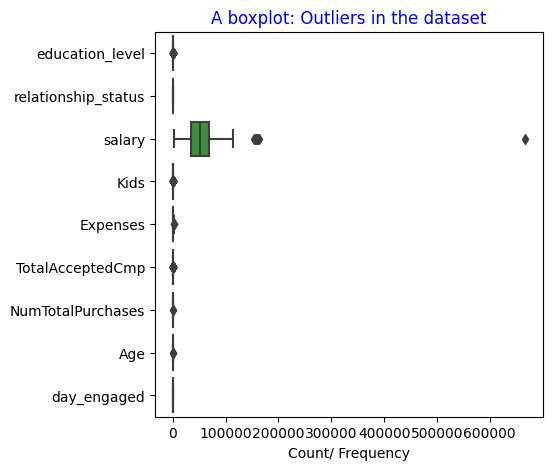

In [52]:
plot.figure(figsize=(5,5))
ax = seaborn.boxplot(data=data_copy , orient="h")
plot.title('A boxplot: Outliers in the dataset', color = 'blue')
plot.xlabel('Count/ Frequency')
plot.show()

In [53]:
numeric_columns = data_copy.select_dtypes(include=numpy.number).columns
q3 = data_copy[numeric_columns].quantile(0.75)
q1 = data_copy[numeric_columns].quantile(0.25)
iqr = q3 - q1

lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

data_copy = data_copy[~((data_copy[numeric_columns] < lower_range) | (data_copy[numeric_columns] > upper_range)).any(axis=1)]


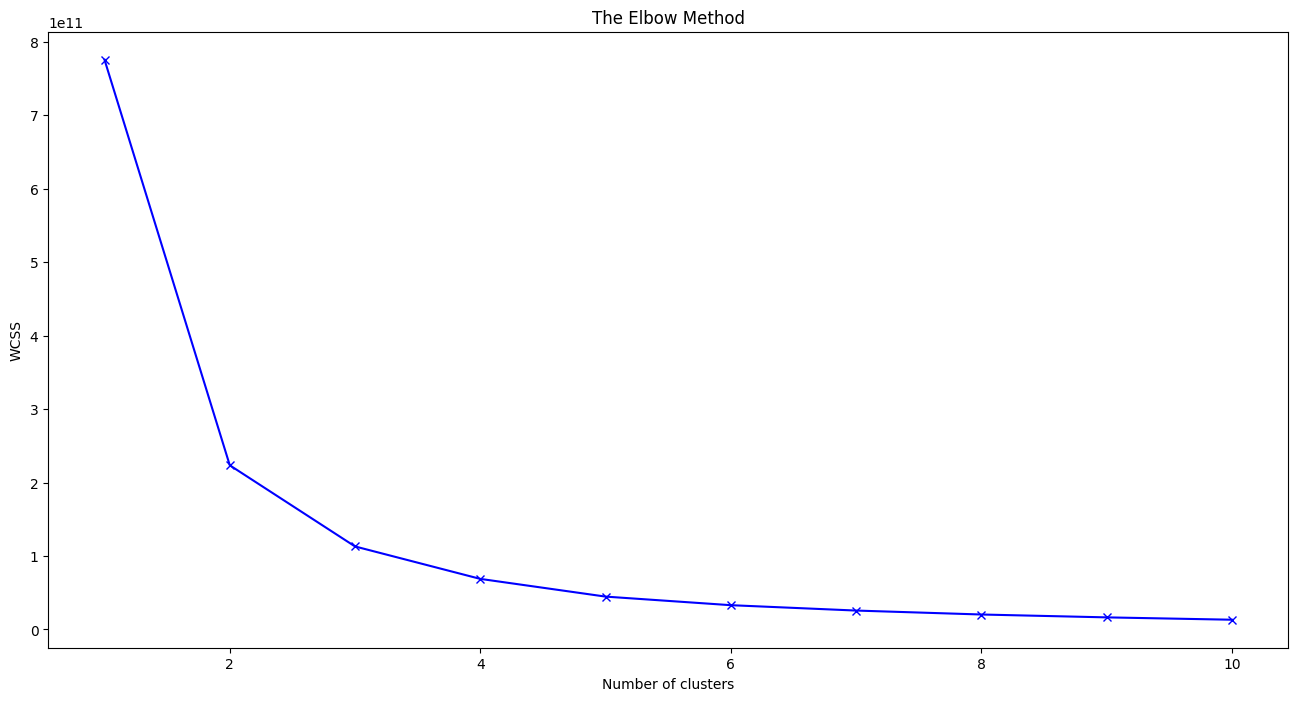

In [54]:
numeric_columns = data_copy.select_dtypes(include=numpy.number).columns
data_numeric = data_copy[numeric_columns]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_numeric)
    wcss.append(kmeans.inertia_)

plot.figure(figsize=(16, 8))
plot.plot(range(1, 11), wcss, 'bx-')
plot.title('The Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.show()

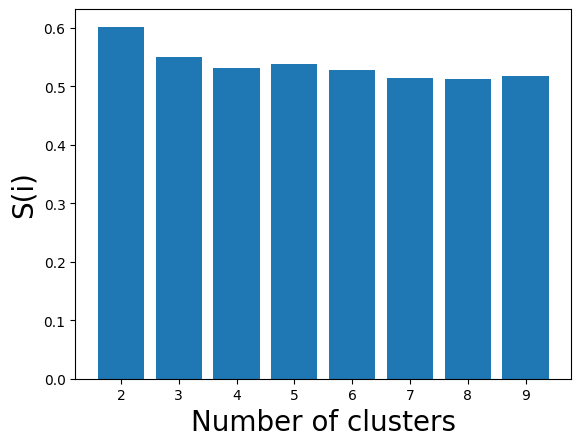

In [55]:
numeric_columns = data_copy.select_dtypes(include=numpy.number).columns
data_numeric = data_copy[numeric_columns]

silhouette_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    c = kmeans.fit_predict(data_numeric)
    silhouette_scores.append(silhouette_score(data_numeric, c))

plot.bar(range(2, 10), silhouette_scores)
plot.xlabel('Number of clusters', fontsize=20)
plot.ylabel('S(i)', fontsize=20)
plot.show()

In [56]:
silhouette_scores

[0.6020033618313175,
 0.5507943911857252,
 0.5306902010312631,
 0.5382176145209517,
 0.528383249500582,
 0.5147554864022281,
 0.5133932844536945,
 0.5173246689234221]

In [57]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


In [58]:
data_copy['relationship_status'] = data_copy['relationship_status'].replace({'Single': 0, 'relationship': 1})

In [59]:
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42).fit(data_numeric)
pred = kmeans.predict(data_numeric)
data_copy['cluster'] = pred + 1

In [60]:
data_copy.head()

education_level  relationship_status   salary  Kids  Expenses   
0                0                    0  58138.0     0      1617  \
1                0                    0  46344.0     2        27   
2                0                    1  71613.0     0       776   
3                0                    1  26646.0     1        53   
4                0                    1  58293.0     1       422   

   TotalAcceptedCmp  NumTotalPurchases  Age  day_engaged  cluster  
0                 1                 25   58          849        1  
1                 0                  6   61          299        2  
2                 0                 21   50          498        1  
3                 0                  8   31          325        2  
4                 0                 19   34          347        1

In [61]:
data_copy['cluster'].value_counts()

cluster
1    1018
2    1004
Name: count, dtype: int64

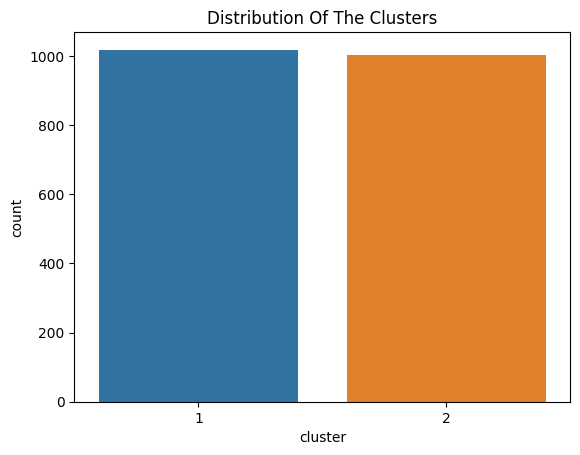

In [62]:
pl = seaborn.countplot(x=data_copy["cluster"])
pl.set_title("Distribution Of The Clusters")
plot.show()

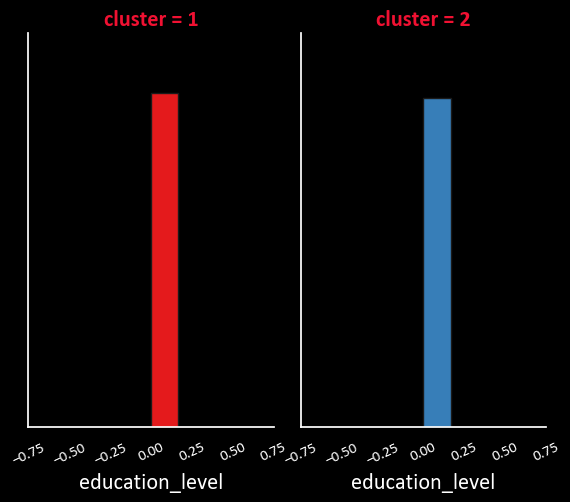

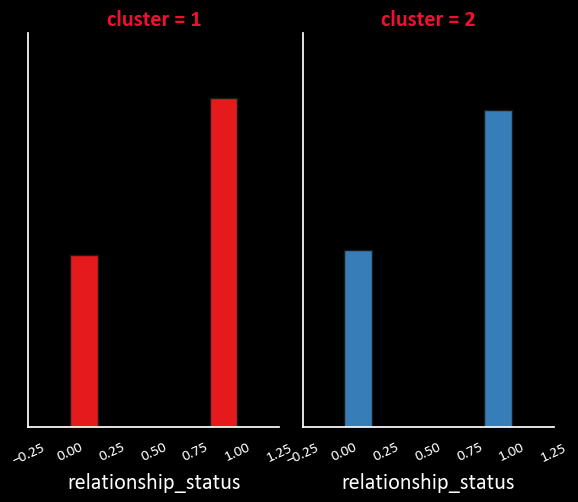

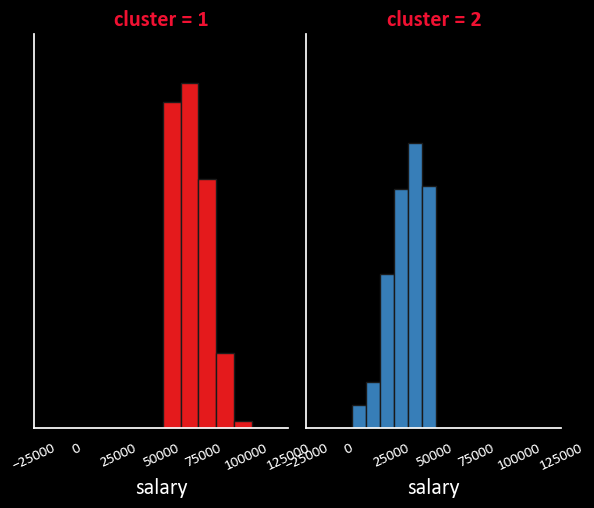

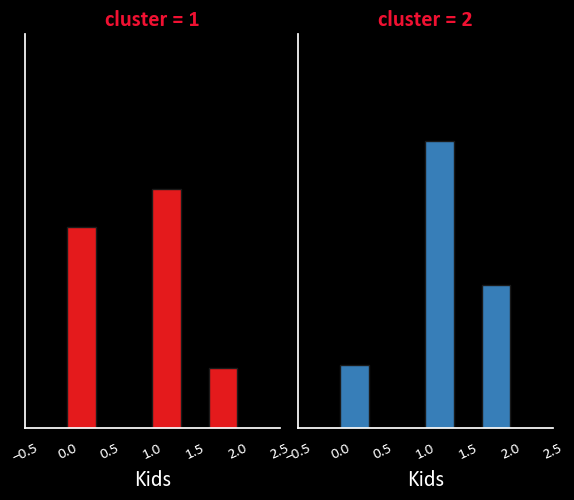

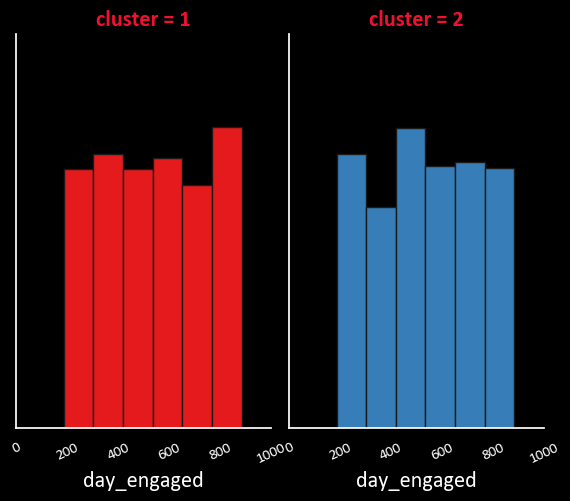

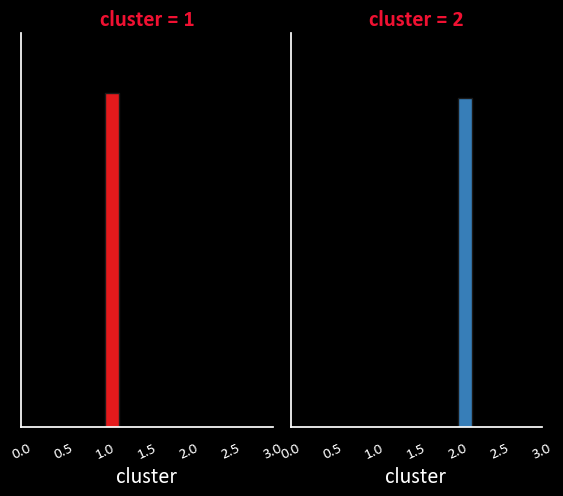

In [63]:
seaborn.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Calibri'})

for i in data_copy:
    diag = seaborn.FacetGrid(data_copy, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plot.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

plot.show()

In [64]:
PLOT = graph_object.Figure()
for C in list(data_copy.cluster.unique()):
    

    PLOT.add_trace(graph_object.Scatter3d(x = data_copy[data_copy.cluster == C]['salary'],
                                y = data_copy[data_copy.cluster == C]['Age'],
                                z = data_copy[data_copy.cluster == C]['day_engaged'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='salary: %{x} <br>Age: %{y} <br>Days Engaged: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'salary', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Days Engaged', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [65]:
print("ConfusionMatrix \n",confusion_matrix(kmeans.labels_, pred))
print("classification report \n", classification_report(kmeans.labels_, pred))

ConfusionMatrix 
 [[1018    0]
 [   0 1004]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1018
           1       1.00      1.00      1.00      1004

    accuracy                           1.00      2022
   macro avg       1.00      1.00      1.00      2022
weighted avg       1.00      1.00      1.00      2022



In [66]:
data = data_copy.copy()
data.head()

education_level  relationship_status   salary  Kids  Expenses   
0                0                    0  58138.0     0      1617  \
1                0                    0  46344.0     2        27   
2                0                    1  71613.0     0       776   
3                0                    1  26646.0     1        53   
4                0                    1  58293.0     1       422   

   TotalAcceptedCmp  NumTotalPurchases  Age  day_engaged  cluster  
0                 1                 25   58          849        1  
1                 0                  6   61          299        2  
2                 0                 21   50          498        1  
3                 0                  8   31          325        2  
4                 0                 19   34          347        1

In [67]:
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pandas.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create salary segment
cut_labels_salary = ['Low salary', 'Low to medium salary', 'Medium to high salary', 'High salary']
data['salary_group'] = pandas.qcut(data['salary'], q=4, labels=cut_labels_salary)
#Create day engaged segment
cut_labels_dayengaged = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['dayengaged_group'] = pandas.qcut(data['day_engaged'], q=4, labels=cut_labels_dayengaged)
data=data.drop(columns=['Age','salary','day_engaged'])

In [68]:
cut_labels = ['Least Active Customer', 'Highly Active Customer']
data['Wines_segment'] = pandas.qcut(products_data['Wines'][products_data['Wines']>0],q=[0, 0.5 ,1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pandas.qcut(products_data['Fruits'][products_data['Fruits']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pandas.qcut(products_data['Meat'][products_data['Meat']>0],q=[0, 0.5,1], labels=cut_labels).astype("object")
data['Fish_segment'] = pandas.qcut(products_data['Fish'][products_data['Fish']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pandas.qcut(products_data['Sweets'][products_data['Sweets']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pandas.qcut(products_data['Gold'][products_data['Gold']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data.replace(numpy.nan, "Inactive Customer",inplace=True)
data = data.astype(object)

In [69]:
data.head()

education_level relationship_status Kids Expenses TotalAcceptedCmp   
0               0                   0    0     1617                1  \
1               0                   0    2       27                0   
2               0                   1    0      776                0   
3               0                   1    1       53                0   
4               0                   1    1      422                0   

  NumTotalPurchases cluster Age_group           salary_group   
0                25       1    Mature  Medium to high salary  \
1                 6       2    Mature   Low to medium salary   
2                21       1    Mature            High salary   
3                 8       2     Adult             Low salary   
4                19       1     Adult  Medium to high salary   

        dayengaged_group           Wines_segment          Fruits_segment   
0          Old customers  Highly Active Customer  Highly Active Customer  \
1          New customers   Least Active Customer   Least Active Customer   
2  Discovering customers  Highly Active Customer  Highly Active Customer   
3          New customers   Least Active Customer   Least Active Customer   
4          New customers   Least Active Customer  Highly Active Customer   

             Meat_segment            Fish_segment          Sweets_segment   
0  Highly Active Customer  Highly Active Customer  Highly Active Customer  \
1   Least Active Customer   Least Active Customer   Least Active Customer   
2  Highly Active Customer  Highly Active Customer  Highly Active Customer   
3   Least Active Customer   Least Active Customer   Least Active Customer   
4  Highly Active Customer  Highly Active Customer  Highly Active Customer   

             Gold_segment  
0  Highly Active Customer  
1   Least Active Customer  
2  Highly Active Customer  
3   Least Active Customer  
4   Least Active Customer

In [70]:
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_colwidth', 999)
pandas.options.display.float_format = "{:.3f}".format

In [71]:
association = data.copy() 
association.head()

education_level relationship_status Kids Expenses TotalAcceptedCmp   
0               0                   0    0     1617                1  \
1               0                   0    2       27                0   
2               0                   1    0      776                0   
3               0                   1    1       53                0   
4               0                   1    1      422                0   

  NumTotalPurchases cluster Age_group           salary_group   
0                25       1    Mature  Medium to high salary  \
1                 6       2    Mature   Low to medium salary   
2                21       1    Mature            High salary   
3                 8       2     Adult             Low salary   
4                19       1     Adult  Medium to high salary   

        dayengaged_group           Wines_segment          Fruits_segment   
0          Old customers  Highly Active Customer  Highly Active Customer  \
1          New customers   Least Active Customer   Least Active Customer   
2  Discovering customers  Highly Active Customer  Highly Active Customer   
3          New customers   Least Active Customer   Least Active Customer   
4          New customers   Least Active Customer  Highly Active Customer   

             Meat_segment            Fish_segment          Sweets_segment   
0  Highly Active Customer  Highly Active Customer  Highly Active Customer  \
1   Least Active Customer   Least Active Customer   Least Active Customer   
2  Highly Active Customer  Highly Active Customer  Highly Active Customer   
3   Least Active Customer   Least Active Customer   Least Active Customer   
4  Highly Active Customer  Highly Active Customer  Highly Active Customer   

             Gold_segment  
0  Highly Active Customer  
1   Least Active Customer  
2  Highly Active Customer  
3   Least Active Customer  
4   Least Active Customer

In [72]:
association.drop(["education_level", "relationship_status", "Kids", "Expenses", "TotalAcceptedCmp", "NumTotalPurchases", "cluster"], axis = 1, inplace = True)
association.head()

Age_group           salary_group       dayengaged_group   
0    Mature  Medium to high salary          Old customers  \
1    Mature   Low to medium salary          New customers   
2    Mature            High salary  Discovering customers   
3     Adult             Low salary          New customers   
4     Adult  Medium to high salary          New customers   

            Wines_segment          Fruits_segment            Meat_segment   
0  Highly Active Customer  Highly Active Customer  Highly Active Customer  \
1   Least Active Customer   Least Active Customer   Least Active Customer   
2  Highly Active Customer  Highly Active Customer  Highly Active Customer   
3   Least Active Customer   Least Active Customer   Least Active Customer   
4   Least Active Customer  Highly Active Customer  Highly Active Customer   

             Fish_segment          Sweets_segment            Gold_segment  
0  Highly Active Customer  Highly Active Customer  Highly Active Customer  
1   Least Active Customer   Least Active Customer   Least Active Customer  
2  Highly Active Customer  Highly Active Customer  Highly Active Customer  
3   Least Active Customer   Least Active Customer   Least Active Customer  
4  Highly Active Customer  Highly Active Customer   Least Active Customer

In [73]:
data_apriori = pandas.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(data_apriori, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

In [74]:
product='Wines'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents   
5875                                                                               (Age_group_Mature, salary_group_High salary, Fruits_segment_Highly Active Customer, Meat_segment_Highly Active Customer)  \
8748                                          (Fruits_segment_Highly Active Customer, Age_group_Mature, Fish_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   
8809                                        (Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Age_group_Mature, salary_group_High salary, Meat_segment_Highly Active Customer)   
6025                                                                                 (Age_group_Mature, Gold_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   
10424  (Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Age_group_Mature, Fish_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   

                                  consequents  antecedent support   
5875   (Wines_segment_Highly Active Customer)               0.102  \
8748   (Wines_segment_Highly Active Customer)               0.093   
8809   (Wines_segment_Highly Active Customer)               0.090   
6025   (Wines_segment_Highly Active Customer)               0.085   
10424  (Wines_segment_Highly Active Customer)               0.083   

       consequent support  support  confidence  lift  leverage  conviction   
5875                0.497    0.101       0.986 1.983     0.050      34.705  \
8748                0.497    0.092       0.984 1.980     0.046      31.687   
8809                0.497    0.088       0.983 1.979     0.044      30.346   
6025                0.497    0.084       0.983 1.977     0.041      28.837   
10424               0.497    0.082       0.982 1.976     0.040      28.166   

       zhangs_metric  
5875           0.552  
8748           0.546  
8809           0.543  
6025           0.540  
10424          0.539

In [75]:
product='Fruits'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents   
6145                                                                                                   (Age_group_Mature, Gold_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)  \
10426                     (Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Age_group_Mature, Fish_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   
9492                                          (Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   
10677  (Gold_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   
9554                                        (Gold_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   

                                   consequents  antecedent support   
6145   (Fruits_segment_Highly Active Customer)               0.085  \
10426  (Fruits_segment_Highly Active Customer)               0.087   
9492   (Fruits_segment_Highly Active Customer)               0.169   
10677  (Fruits_segment_Highly Active Customer)               0.153   
9554   (Fruits_segment_Highly Active Customer)               0.161   

       consequent support  support  confidence  lift  leverage  conviction   
6145                0.394    0.080       0.942 2.393     0.047      10.429  \
10426               0.394    0.082       0.938 2.381     0.047       9.701   
9492                0.394    0.158       0.936 2.377     0.092       9.426   
10677               0.394    0.143       0.935 2.376     0.083       9.398   
9554                0.394    0.150       0.935 2.376     0.087       9.384   

       zhangs_metric  
6145           0.636  
10426          0.635  
9492           0.697  
10677          0.684  
9554           0.690

In [76]:
product='Meat'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents   
10672  (Gold_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, salary_group_High salary)  \
5872                                                                                                  (salary_group_High salary, Age_group_Mature, Wines_segment_Highly Active Customer, Fruits_segment_Highly Active Customer)   
6712                                                                             (salary_group_High salary, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fruits_segment_Highly Active Customer)   
6742                                                                               (salary_group_High salary, Wines_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Fruits_segment_Highly Active Customer)   
8312                                                   (Gold_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Age_group_Adult)   

                                 consequents  antecedent support   
10672  (Meat_segment_Highly Active Customer)               0.143  \
5872   (Meat_segment_Highly Active Customer)               0.101   
6712   (Meat_segment_Highly Active Customer)               0.184   
6742   (Meat_segment_Highly Active Customer)               0.167   
8312   (Meat_segment_Highly Active Customer)               0.080   

       consequent support  support  confidence  lift  leverage  conviction   
10672               0.496    0.143       1.000 2.016     0.072         inf  \
5872                0.496    0.101       1.000 2.016     0.051         inf   
6712                0.496    0.184       1.000 2.016     0.093         inf   
6742                0.496    0.167       1.000 2.016     0.084         inf   
8312                0.496    0.080       1.000 2.016     0.040         inf   

       zhangs_metric  
10672          0.588  
5872           0.561  
6712           0.618  
6742           0.605  
8312           0.548

In [77]:
product='Fish'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents   
6953                                                                               (Wines_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Gold_segment_Highly Active Customer, salary_group_High salary)  \
10674  (Gold_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   
9613                                        (Gold_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, salary_group_High salary)   
9676                                          (Gold_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   
3248                                                                                                                     (Sweets_segment_Highly Active Customer, Gold_segment_Highly Active Customer, salary_group_High salary)   

                                 consequents  antecedent support   
6953   (Fish_segment_Highly Active Customer)               0.161  \
10674  (Fish_segment_Highly Active Customer)               0.150   
9613   (Fish_segment_Highly Active Customer)               0.150   
9676   (Fish_segment_Highly Active Customer)               0.161   
3248   (Fish_segment_Highly Active Customer)               0.169   

       consequent support  support  confidence  lift  leverage  conviction   
6953                0.404    0.154       0.954 2.361     0.089      12.952  \
10674               0.404    0.143       0.954 2.361     0.083      12.941   
9613                0.404    0.143       0.954 2.361     0.083      12.941   
9676                0.404    0.153       0.954 2.361     0.088      12.912   
3248                0.404    0.160       0.947 2.344     0.092      11.290   

       zhangs_metric  
6953           0.687  
10674          0.678  
9613           0.678  
9676           0.687  
3248           0.690

In [78]:
product='Sweets'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents   
3251                                                                              (Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer, salary_group_High salary)  \
7074                                       (salary_group_High salary, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Fruits_segment_Highly Active Customer)   
7105                                         (Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer, salary_group_High salary)   
9739  (Gold_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Fish_segment_Highly Active Customer, salary_group_High salary, Meat_segment_Highly Active Customer)   
6955                                        (Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Gold_segment_Highly Active Customer, salary_group_High salary)   

                                  consequents  antecedent support   
3251  (Sweets_segment_Highly Active Customer)               0.176  \
7074  (Sweets_segment_Highly Active Customer)               0.164   
7105  (Sweets_segment_Highly Active Customer)               0.174   
9739  (Sweets_segment_Highly Active Customer)               0.163   
6955  (Sweets_segment_Highly Active Customer)               0.170   

      consequent support  support  confidence  lift  leverage  conviction   
3251               0.389    0.160       0.910 2.338     0.091       6.776  \
7074               0.389    0.149       0.909 2.336     0.085       6.739   
7105               0.389    0.158       0.909 2.336     0.091       6.719   
9739               0.389    0.148       0.909 2.335     0.085       6.698   
6955               0.389    0.154       0.907 2.330     0.088       6.547   

      zhangs_metric  
3251          0.694  
7074          0.684  
7105          0.692  
9739          0.683  
6955          0.687

In [79]:
product='Gold'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

antecedents   
10175  (Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Meat_segment_Highly Active Customer)  \
7676                                        (Sweets_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Fish_segment_Highly Active Customer)   
8316                         (Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Age_group_Adult, Meat_segment_Highly Active Customer)   
5173                                                              (Age_group_Adult, Fish_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fruits_segment_Highly Active Customer)   
7616                                          (Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fruits_segment_Highly Active Customer)   

                                 consequents  antecedent support   
10175  (Gold_segment_Highly Active Customer)               0.233  \
7676   (Gold_segment_Highly Active Customer)               0.235   
8316   (Gold_segment_Highly Active Customer)               0.094   
5173   (Gold_segment_Highly Active Customer)               0.095   
7616   (Gold_segment_Highly Active Customer)               0.271   

       consequent support  support  confidence  lift  leverage  conviction   
10175               0.473    0.198       0.850 1.797     0.088       3.505  \
7676                0.473    0.199       0.848 1.794     0.088       3.478   
8316                0.473    0.080       0.848 1.794     0.035       3.472   
5173                0.473    0.080       0.844 1.785     0.035       3.374   
7616                0.473    0.228       0.843 1.783     0.100       3.359   

       zhangs_metric  
10175          0.579  
7676           0.579  
8316           0.489  
5173           0.486  
7616           0.602

In [80]:
data_copied=data_copy.copy()
x = data_copied.drop('cluster', axis=1)
y = data_copied['cluster']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [82]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [83]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [85]:
y_predicted = log_reg.predict(x_test)

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       200
           2       1.00      1.00      1.00       205

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9950617283950617
----------------------------------------------------------------------------------------------------

F1 Score:  0.995
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


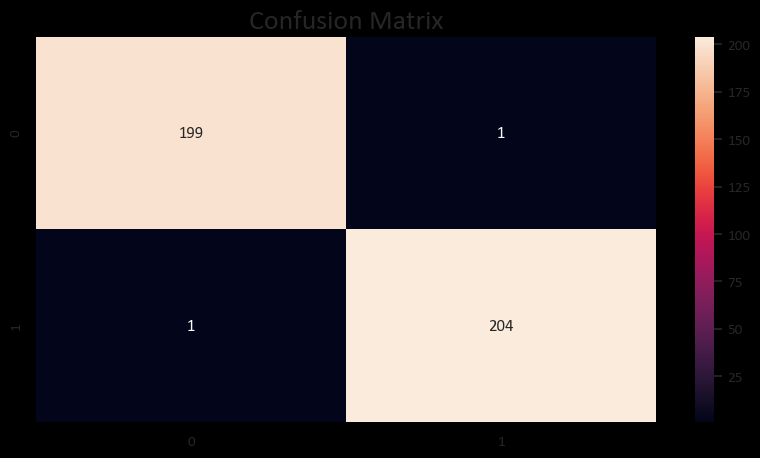

In [86]:
print("Classification Report: \n", classification_report(y_test,y_predicted))
print("-" * 100)
print()
    
acc = accuracy_score(y_test, y_predicted)

print("Accuracy Score: ", acc)
print("-" * 100)
print()

f1 = f1_score(y_test, y_predicted)

print("F1 Score: ", f1)
print("-" * 100)
print()
    
print("Confusion Matrix: ")
plot.figure(figsize=(10, 5))
seaborn.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='g');
plot.title('Confusion Matrix', fontsize=20)
plot.show()